## NOM:  xxxx   Prénom: xxx

Une fois fini, rendre votre compte rendu sous forme de fichier HTML (file/download as/html) sur le dépôt dédié sur la page EAD du cours.

# MECA302 RESISTANCE DES MATERIAUX

## TP n°1

In [41]:
# Quelques librairies
%matplotlib nbagg
%load_ext autoreload
%autoreload 2
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from MECA302 import Torseur
sp.init_printing(use_latex = "mathjax")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Avant de commencer: introduction à Python et en particulier Sympy

Ce TP utilise uniquement des outils libres (Open Source) liés au langage Python. Une librairie dédiée à nos problèmes de torseurs a été écrite pour l'occasion, c'est le fichier `MECA302.py`qui est dans le même dossier. Ce TP utilise beaucoup le module Sympy qui permet d'introduire du calcul formel dans Python. Voici donc quelques outils indispensables pour démarrer avec Sympy:

In [42]:
a, b, c, x = sp.symbols("a b c x", real = True) # Création d'une ou plusieurs variable littérale. 
#Ici on spécifie que sont des réels
a, b, c, x

(a, b, c, x)

In [43]:
y = a*x**2 + b*x + c # y est une expression qui dépend des variables créées précédement.
y.diff(x) # On peut dériver par rapport à x

2⋅a⋅x + b

In [44]:
y.integrate(x) # Une primitive

   3      2      
a⋅x    b⋅x       
──── + ──── + c⋅x
 3      2        

In [45]:
y.integrate((x, 0, 5)).simplify() # Une intégrale entre 0 et 5

125⋅a   25⋅b      
───── + ──── + 5⋅c
  3      2        

In [46]:
z = y**3 # Une expression plus complexe
z

                3
⎛   2          ⎞ 
⎝a⋅x  + b⋅x + c⎠ 

In [47]:
z.expand() # Développer

 3  6      2    5      2    4        2  4            3        2  2    3  3    
a ⋅x  + 3⋅a ⋅b⋅x  + 3⋅a ⋅c⋅x  + 3⋅a⋅b ⋅x  + 6⋅a⋅b⋅c⋅x  + 3⋅a⋅c ⋅x  + b ⋅x  + 3

  2    2        2      3
⋅b ⋅c⋅x  + 3⋅b⋅c ⋅x + c 

In [48]:
eq1 = sp.Eq(y, 0) # L'équation y = 0
eq1

   2              
a⋅x  + b⋅x + c = 0

In [49]:
sp.solve(eq1, x) # Les solutions de l'équation !

⎡        _____________   ⎛       _____________⎞ ⎤
⎢       ╱           2    ⎜      ╱           2 ⎟ ⎥
⎢-b + ╲╱  -4⋅a⋅c + b    -⎝b + ╲╱  -4⋅a⋅c + b  ⎠ ⎥
⎢─────────────────────, ────────────────────────⎥
⎣         2⋅a                     2⋅a           ⎦

In [50]:
# Utiliser des valeurs numériques:
y.subs(x, 5) # On substitue une valeur une fois

25⋅a + 5⋅b + c

In [51]:
values = {a:5., b:4., c:7.} # Une bonne manière de définie les valeurs numériques connues d'un coup
yv = y.subs(values)
yv

     2              
5.0⋅x  + 4.0⋅x + 7.0

In [52]:
yf = sp.lambdify(x, yv, "numpy") # Une fonction vectorielle, c'est à dire applicable en N points d'un coup
xv = np.linspace(0., 1., 11) # 11 valeurs de x équiréparties entre 0 et 1.
xv

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [53]:
yf(xv) # Pratique !

array([ 7.  ,  7.45,  8.  ,  8.65,  9.4 , 10.25, 11.2 , 12.25, 13.4 ,
       14.65, 16.  ])

<IPython.core.display.Javascript object>


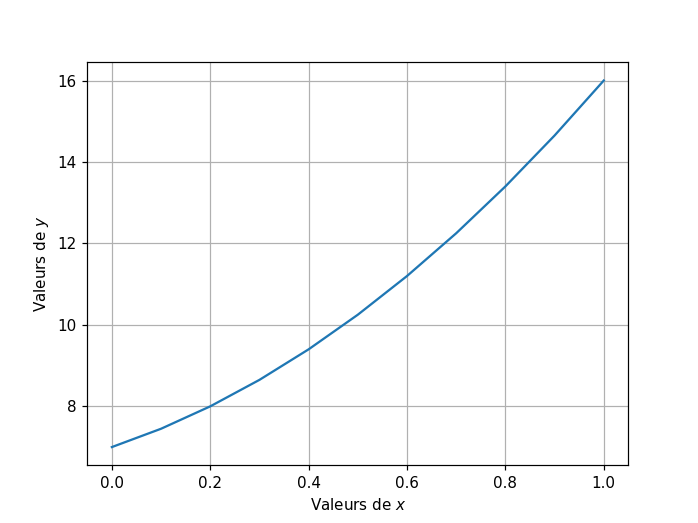

In [54]:
plt.figure()
plt.plot(xv, yf(xv))
plt.grid()
plt.xlabel("Valeurs de $x$")
plt.ylabel("Valeurs de $y$")
plt.show()

### Première Partie: traitement d'un problème simple au résultat connu

#### Quelques outils qui vous seront utiles

Exemple d'utilisation de la classe *Torseur*

In [2]:
F, L, x = sp.symbols("F L x")
TF = Torseur(r = [0, -F, 0], p = [L, 0, 0])
TF  = TF.transport([L/2,0,0])
TF

<Torseur: R=[0 -F 0], M=[0 0 -F*L/2], P=[L/2 0 0]>

#### Problème à traiter


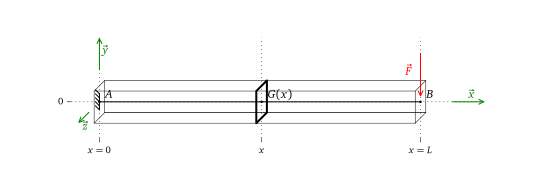

In [3]:
from IPython.display import Image, SVG
SVG(filename='TP2_ex1.svg')

On suppose que la poutre est homogène, section uniforme ayant un moment quadratique $I_z$. Le matériau constitutif est élastique de module de Young $E$. La section est carrée de coté $a$. 

##### Travail demandé
* Ecrire les torseurs d'action mécanique en $A$ et $B$ en utilisant la classe Torseur:

* Ecrire l'équilibre et en déduire la valeur des inconnues de liaison

* Ecrire le torseur de cohésion

Astuce: vous le droit de définir une variable $x$  et un point $G(x)$ auquel transporter le torseur *ad hoc*.

* Calculer la flèche $u_y(x)$ en tout point de la poutre. 

* Faire une application numérique en sachant que $L = 1$ m, $F = 1$ kN, $E = 200$ GPa et $a = 2$ cm et tracer la forme de la déformée. 

* En déduire l'endroit où la flèche est maximale et sa valeur.

### Second partie: traitement d'un problème plus complexe


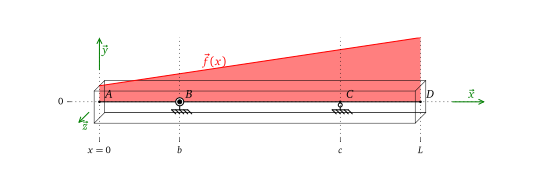

In [4]:
from IPython.display import Image, SVG
SVG(filename='TP2_ex2.svg')

La poutre ci dessus est droite, homogène, de section carrée de coté $a$ et de longueur $L$. Elle est soumis à une chargé répartie affine:
$$
f(x) = -f_0 + (f_0-f_1) \dfrac{x}{L}
$$
On notera que $f_0$ et $f_1$ sont des constantes. La poutre repose sur deux appuis situés en $B(x = b)$ et $C(x=c)$.  

##### Travail demandé
* Ecrire les torseurs d'action mécanique en $B$,  $C$ et celui découlant de la force répartie $f$ en utilisant la classe Torseur:

* Ecrire l'équilibre et en déduire la valeur des inconnues de liaison

* Ecrire le torseur de cohésion dans les différents cas possibles


* Calculer la flèche $u_y(x)$ en tout point de la poutre. 

* Faire une application numérique en sachant que $L = 1$ m, $f_0 = 1$ kN/m, $f_1 = 4$ kN/m, $E = 200$ GPa et $a = 2$ cm. Le résultat dépend encore de $b$ et $c$. 

* On va supposer que les deux points $B$ et $C$ sont symmétriques dans un premier temps. On a alors $a = L/2 -e$ et $b =L/2+e$. Tracer la flèche maximale en fonction $e \in [0, L/2]$ et en déduire la valeur optimale de $e$ pour minimiser la flèche.

* On suppose maintenant que $a$ et $b$ sont indépendants. Proposez une méthode pour trouver la valeur optimale de chacun des paramètres.